In [35]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# import the dataset
# Making a list of missing value types
missing_values = ["?", ""]
df = pd.read_csv('AL_NJ_Income_pct.csv', na_values = missing_values) 
print(df.shape)
df.head(10)

(1167, 10)


,STATEFIPS,STATE,zipcode,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6,total
0,1,AL,35004,28.98,27.06,18.23,12.48,12.09,1.15,5210
1,1,AL,35005,42.26,30.97,14.52,6.45,5.81,0.00,3100
2,1,AL,35006,35.83,27.50,15.83,10.00,10.83,0.00,1200
3,1,AL,35007,34.09,22.19,15.24,11.22,15.24,2.01,11940
4,1,AL,35010,45.76,26.17,11.25,6.70,7.84,2.28,7910
5,1,AL,35014,40.74,28.40,12.96,8.64,7.41,1.85,1620
6,1,AL,35016,39.41,24.26,14.87,9.54,10.10,1.82,7130
7,1,AL,35019,40.45,28.09,15.73,6.74,8.99,0.00,890
8,1,AL,35020,60.22,27.29,7.96,2.54,1.77,0.22,9050
9,1,AL,35022,33.06,24.80,16.43,10.41,13.27,2.04,9800


# EDA

In [36]:
df.isnull().sum()

STATEFIPS       0
STATE           0
zipcode         0
Returns_pct1    0
Returns_pct2    0
Returns_pct3    0
Returns_pct4    0
Returns_pct5    0
Returns_pct6    0
total           0
dtype: int64

In [37]:
X = df.drop(['STATEFIPS', 'STATE', 'zipcode', 'total'], axis=1)
y=df[['STATE']]

scaled_features = MinMaxScaler().fit_transform(X)

# Get two principal components
pca = PCA(n_components= 2).fit(scaled_features)
features_2d = pca.transform(scaled_features)
features_2d[0:10]

array([[-3.72720802e-03, -2.10267683e-01],
       [-3.10221493e-01,  2.46683501e-03],
       [-1.06916192e-01, -1.21519302e-01],
       [ 6.37935465e-02, -1.20772179e-01],
       [-2.30039150e-01,  5.78927206e-02],
       [-2.11629497e-01, -3.73205296e-02],
       [-1.05302776e-01, -5.38815388e-02],
       [-2.08586066e-01, -3.70474061e-03],
       [-5.02595596e-01,  2.20212394e-01],
       [ 4.89173637e-04, -1.09997806e-01]])

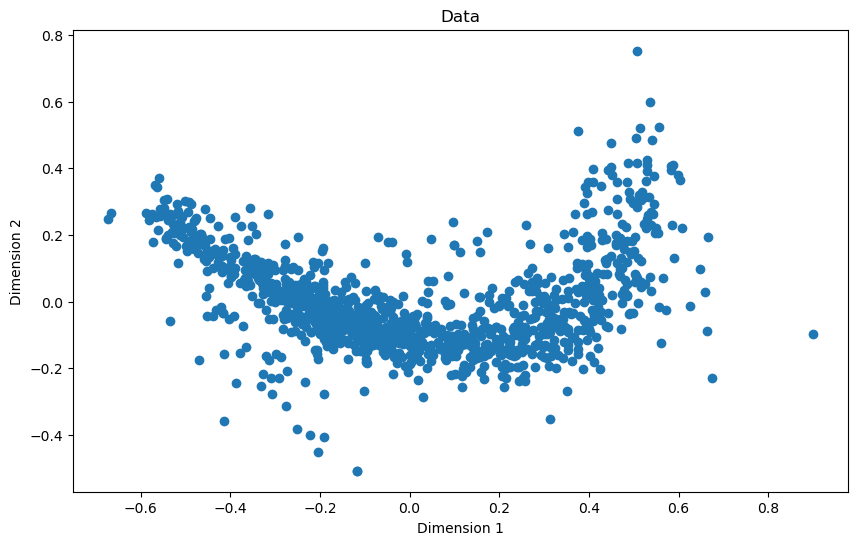

In [38]:
plt.figure(figsize=(10,6))
plt.scatter(features_2d[:,0], features_2d[:,1])
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Data')
plt.show()

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(scaled_features, df['STATE'], test_size=0.3, random_state=1)    # Use 30% test 70% training data.

# Problem 1 Clustering
The “AL_NJ_Income_pct” CSV dataset on CANVAS categorizes the tax returns of families in the states of Alabama and New Jersey into six categories (Returns_pct1 to Returns_pct6). Use these six categories and Euclidian distance, to perform the following analysis

•	Use the kmeans clustering method to create two clusters for the “AL_NJ_Income_pct” dataset.

In [40]:
from sklearn.cluster import KMeans
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit_predict(features_2d)

array([0, 0, 0, ..., 0, 1, 1])

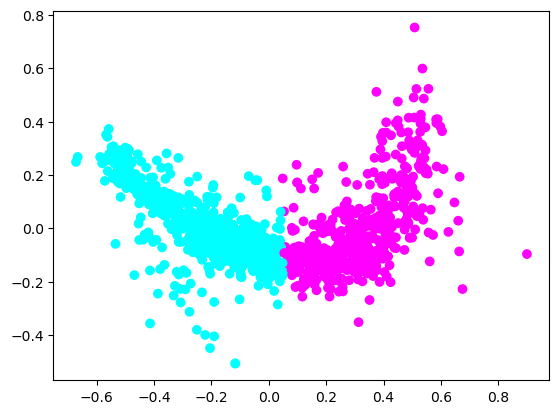

In [41]:
# Visualizing the clustering 

plt.scatter(features_2d[:,0], features_2d[:,1], c= kmeans_2.labels_, cmap="cool")
plt.show()

•	Show the cross tabulation of the clusters versus the State feature.

In [42]:
Table_1 = df[['STATE']]
Table_1["Cluster"] = kmeans_2.fit_predict(features_2d)
Table_1["Cluster"] = Table_1["Cluster"].astype("category")

Table_1.head(20)

,STATE,Cluster
0,AL,0
1,AL,0
2,AL,0
3,AL,1
4,AL,0
5,AL,0
6,AL,0
7,AL,0
8,AL,0
9,AL,0


In [43]:
pd.crosstab(Table_1['STATE'], Table_1['Cluster'])

Cluster,0,1
STATE,,
AL,519,72
NJ,168,408


•	Use the hierarchical clustering method and single linkage to create 4 clusters for the the “AL_NJ_Income_pct” dataset

In [44]:
from sklearn.cluster import AgglomerativeClustering

hclust = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='single')
hclust.fit_predict(features_2d)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

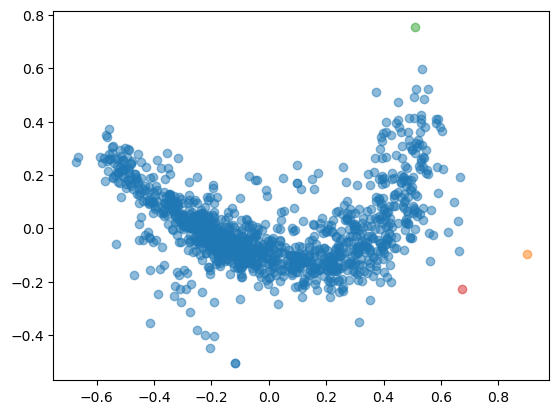

In [45]:
# plotting the clusters
for c in np.unique(hclust.fit_predict(features_2d)):
    plt.scatter(features_2d[hclust.fit_predict(features_2d) == c, 0],
                features_2d[hclust.fit_predict(features_2d) == c, 1], label='cluster='+str(c), alpha=.5)

In [46]:
Table_2 = df[['STATE']]
Table_2["Cluster"] = hclust.fit_predict(features_2d)
Table_2["Cluster"] = Table_2["Cluster"].astype("category")

Table_2.head(20)

,STATE,Cluster
0,AL,0
1,AL,0
2,AL,0
3,AL,0
4,AL,0
5,AL,0
6,AL,0
7,AL,0
8,AL,0
9,AL,0


In [47]:
pd.crosstab(Table_2['STATE'], Table_2['Cluster'])

Cluster,0,1,2,3
STATE,,,,
AL,590,0,0,1
NJ,574,1,1,0


•	Identify the outliers (if any).

Detecting Outliers using DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
model = DBSCAN(eps = 0.06, min_samples = 5).fit(features_2d)

In [49]:
# visualize outputs
colors = model.labels_

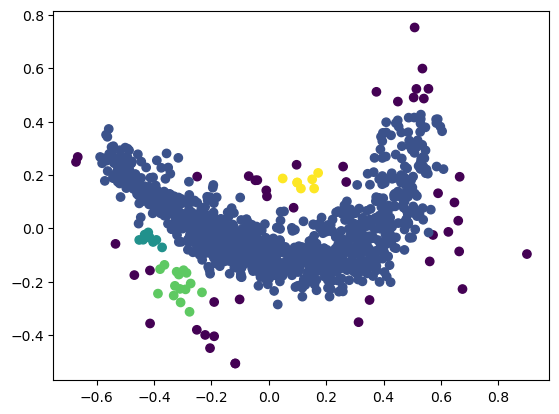

In [50]:
plt.scatter(features_2d[:,0], features_2d[:,1], c = colors)

In [51]:
outliers =X[model.labels_ == -1]
outliers.head(20)

,Returns_pct1,Returns_pct2,Returns_pct3,Returns_pct4,Returns_pct5,Returns_pct6
45,24.60,17.46,18.25,15.08,23.02,1.59
89,40.00,20.00,11.85,7.41,11.85,8.89
95,33.58,22.22,11.78,7.69,15.29,9.44
203,32.56,30.23,13.95,13.95,9.30,0.00
229,40.74,29.63,18.52,0.00,11.11,0.00
236,22.80,13.51,11.28,10.90,30.73,10.78
251,16.28,13.95,16.28,13.95,34.88,4.65
309,39.47,26.32,15.79,0.00,18.42,0.00
393,50.00,37.50,0.00,12.50,0.00,0.00
443,63.64,36.36,0.00,0.00,0.00,0.00


In [52]:
print(outliers.shape)

(44, 6)


We can see there are 44 outliers.

# Problem 2 Random Forest

Use the Random Forest methodology to develop a classification model for the “State” (target), using the Returns_pct1 to Returns_pct6 features in the “AL_NJ_Income_pct dataset. 

•	Show the cross tabulation of the classification.




In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# instantiate the classifier with n_estimators = 100

rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)


# fit the model to the training set

rfc_100.fit(X_train, y_train)


# Predict on the test set results

y_pred_100 = rfc_100.predict(X_test)

In [54]:
pd.crosstab(y_test, y_pred_100, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,AL,NJ,All
Actual,,,
AL,148,35,183
NJ,31,137,168
All,179,172,351


•	What is the accuracy of your model?

•	What is the precision of the model?

•	What is the recall of the model?

•	What is the F1 of the model?

In [55]:
# Check accuracy score 

print('Model accuracy score of Random Forest: {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score of Random Forest: 0.8120


In [56]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_100))

              precision    recall  f1-score   support

          AL       0.83      0.81      0.82       183
          NJ       0.80      0.82      0.81       168

    accuracy                           0.81       351
   macro avg       0.81      0.81      0.81       351
weighted avg       0.81      0.81      0.81       351



# Problem 3 C5.0 Forest

Use the C5.0 Forest methodology to develop a classification model for the “State” (target), using the Returns_pct1 to Returns_pct6 features in the “AL_NJ_Income_pct dataset. 

•	Show the cross tabulation of the classification. 



In [57]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt
dt =  DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=1)#C5.0 use criterion parameter as entropy.

# Fit dt to the training set
dt.fit(X_train, y_train)

y_pred_c5 = dt.predict(X_test)

pd.crosstab(y_test, y_pred_c5, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,AL,NJ,All
Actual,,,
AL,148,35,183
NJ,42,126,168
All,190,161,351


•	What is the accuracy of your model?

•	What is the precision of the model?

•	What is the recall of the model?

•	What is the F1 of the model?

In [58]:
print(classification_report(y_test,y_pred_c5))

              precision    recall  f1-score   support

          AL       0.78      0.81      0.79       183
          NJ       0.78      0.75      0.77       168

    accuracy                           0.78       351
   macro avg       0.78      0.78      0.78       351
weighted avg       0.78      0.78      0.78       351



# Problem # 4 Problem # 4

Use theCART methodology to develop a classification model for the “State” (target), using the Returns_pct1 to Returns_pct6 features in the “AL_NJ_Income_pct dataset. 


•	Show the cross tabulation of the classification. 


In [59]:
# import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=1)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred_cart = dt.predict(X_test)
pd.crosstab(y_test, y_pred_cart, margins=True, rownames=['Actual'], colnames=['Predicted'])

Predicted,AL,NJ,All
Actual,,,
AL,150,33,183
NJ,46,122,168
All,196,155,351


•	What is the accuracy of your model?

•	What is the precision of the model?

•	What is the recall of the model?

•	What is the F1 of the model?

In [60]:
print(classification_report(y_test,y_pred_cart))

              precision    recall  f1-score   support

          AL       0.77      0.82      0.79       183
          NJ       0.79      0.73      0.76       168

    accuracy                           0.77       351
   macro avg       0.78      0.77      0.77       351
weighted avg       0.78      0.77      0.77       351



# Problem # 5 Neural Network

Using data in the table below, construct a Neural Network with one Output Layer (z) and one Hidden Layer (two nodes A and B).  Calculate the predicted outcome if the inputs to the input nodes are (Node 1=.4, Node 2=.7 Node 3= .7 and Node 4=.2)
Use the actual value of .75 and a learning factor of .1 to adjust the weight for xx to z.

After calculation in xlsx file, we can get the predicted outcome is 0.88643 and adjusted weight for xx to z is 0.498626535.